# Clustering Antartic Penguin Species

![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [22]:
# Importing Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Performing preprocessing steps on the dataset to create dummy variables
Creating dummy variables for the available categorical feature in the dataset, then droping the original column.

In [23]:
# One-hot encode categorical variable 'sex'
penguins_cat = pd.get_dummies(penguins_df['sex'], drop_first=True)

# Selecting numerical columns for scaling
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_num = penguins_df[numerical_cols]

In [24]:
# Standardizing/scaling before clustering
scaler = StandardScaler()
penguins_num_scaled = scaler.fit_transform(penguins_num)

# Converting scaled numerical data back into a DataFrame
penguins_num_scaled = pd.DataFrame(penguins_num_scaled, columns=numerical_cols, index=penguins_df.index)

# Concatenating scaled numerical data with encoded categorical data
penguins_preprocessed = pd.concat([penguins_num_scaled, penguins_cat], axis=1)

print(penguins_preprocessed.head())  # Check the transformed dataset

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  MALE
0         -0.903906         0.790360          -1.425342    -0.566948     1
1         -0.830434         0.126187          -1.068577    -0.504847     0
2         -0.683490         0.432728          -0.426399    -1.187953     0
3         -1.344738         1.096901          -0.569105    -0.939551     0
4         -0.867170         1.761074          -0.783164    -0.691149     1


## Detecting the optimal number of clusters for k-means clustering
Performing Elbow analysis to determine the optimal number of clusters for this dataset.

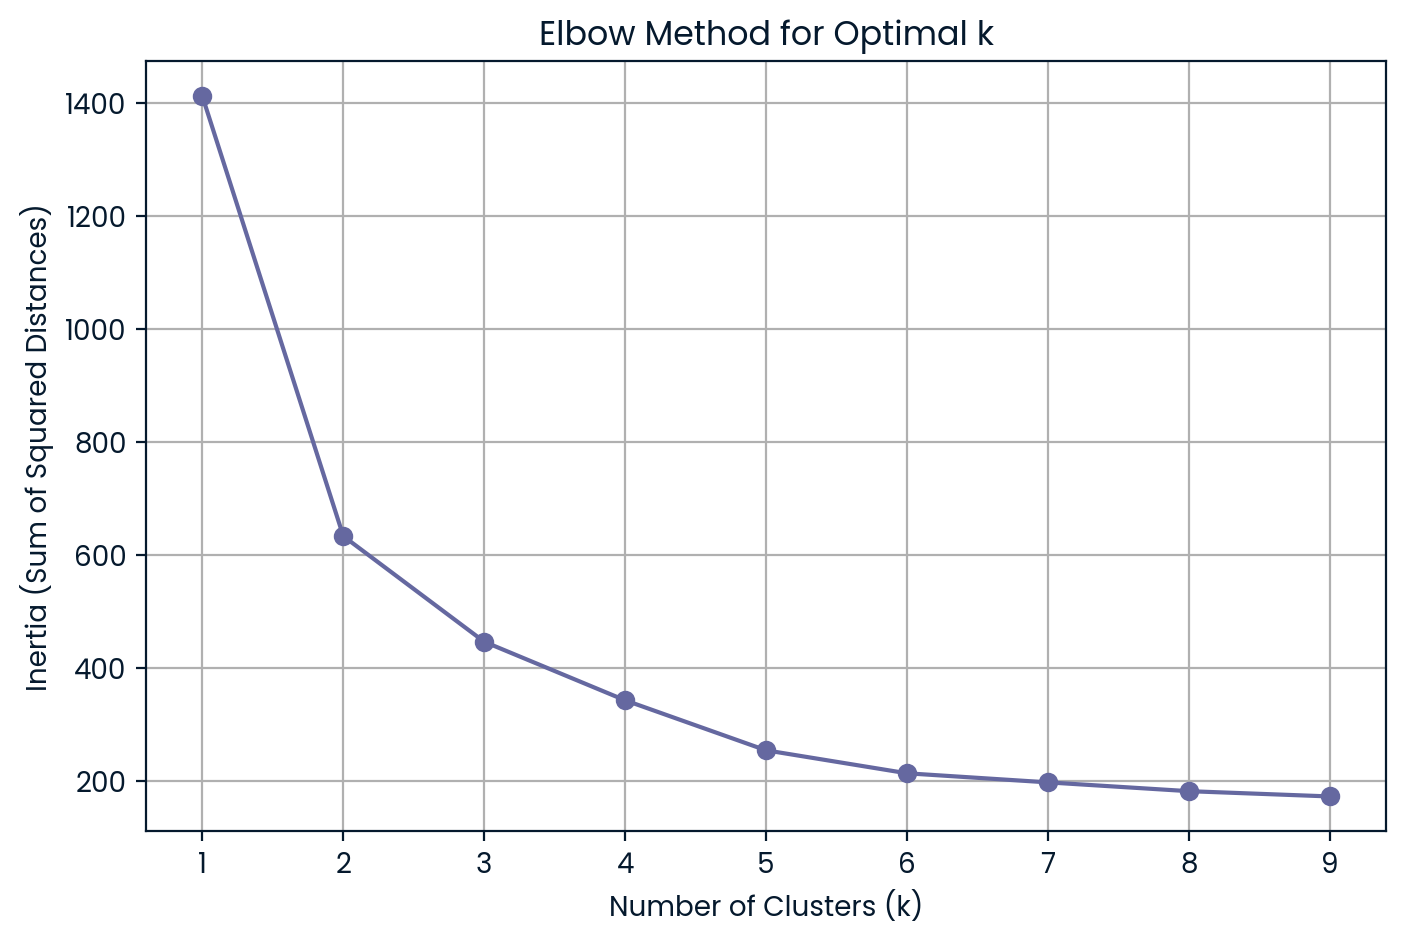

In [25]:
inertia = []

# Initiating an empty list to store inertia values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)  # Fit model to preprocessed data
    inertia.append(kmeans.inertia_)  # Store inertia value

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


## Running the k-means clustering algorithm
By using the optimal number of clusters obtained from the previous step, now we can run the k-means clustering algorithm once more on the preprocessed data.

In [26]:
optimal_k = 3  #  Optimal elbow

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
penguins_preprocessed['Cluster'] = kmeans.fit_predict(penguins_num_scaled)

# View first few rows with assigned clusters
print(penguins_preprocessed.head())

   culmen_length_mm  culmen_depth_mm  ...  MALE  Cluster
0         -0.903906         0.790360  ...     1        2
1         -0.830434         0.126187  ...     0        2
2         -0.683490         0.432728  ...     0        2
3         -1.344738         1.096901  ...     0        2
4         -0.867170         1.761074  ...     1        2

[5 rows x 6 columns]


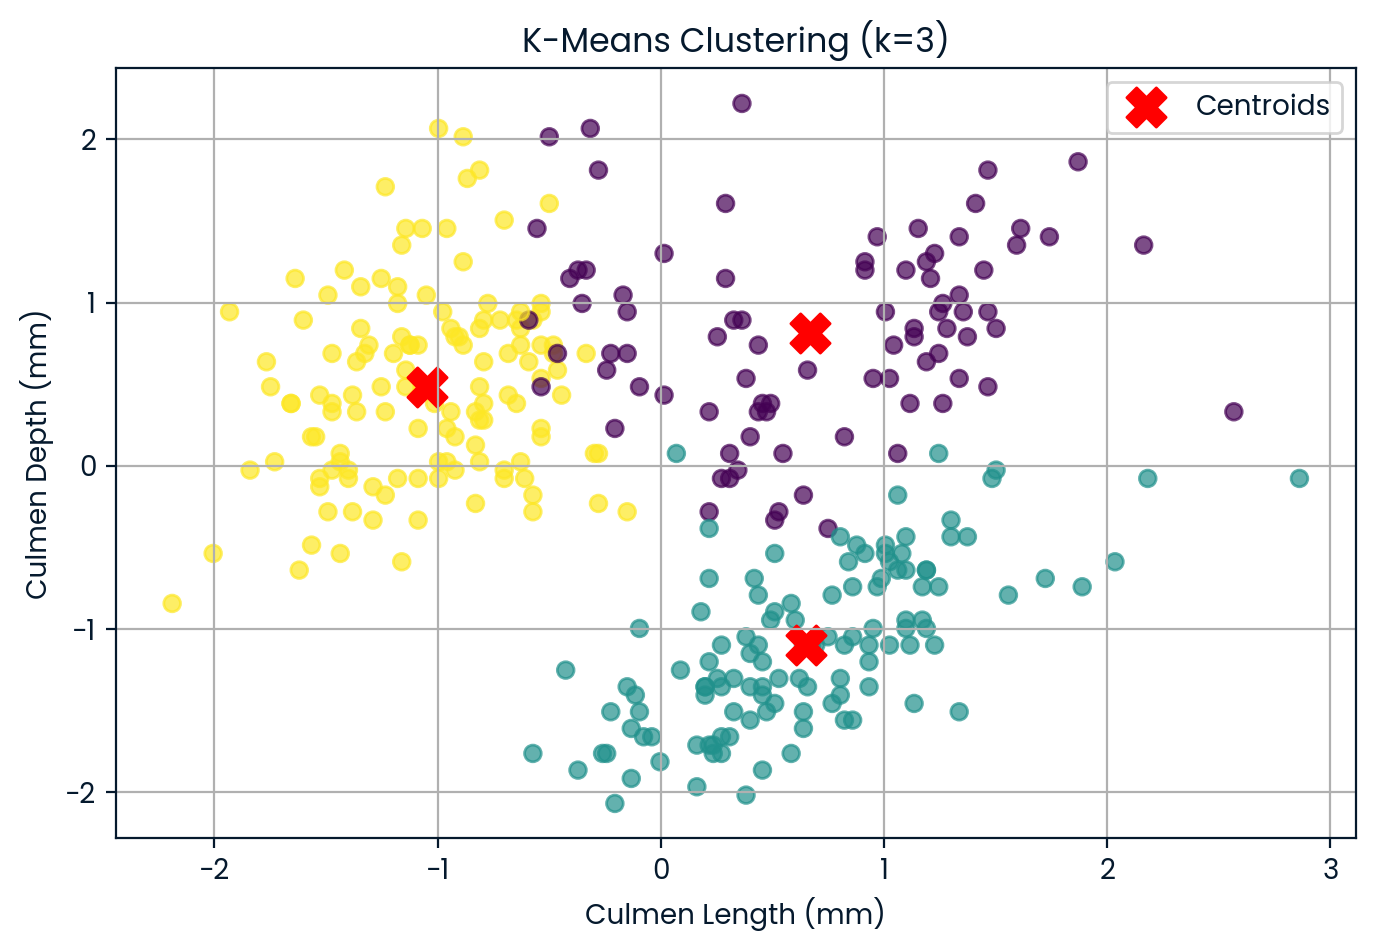

In [27]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(
    penguins_preprocessed['culmen_length_mm'],
    penguins_preprocessed['culmen_depth_mm'],
    c=penguins_preprocessed['Cluster'],  # Color by cluster
    cmap='viridis',  # Color map
    alpha=0.7  # Transparency
)

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # X-axis: culmen_length_mm
    kmeans.cluster_centers_[:, 1],  # Y-axis: culmen_depth_mm
    s=200, c='red', marker='X', label='Centroids'
)

# Labels and title
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Defining numeric columns (excluding binary categorical columns)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Adding cluster labels to the original dataset
penguins_df['label'] = kmeans.labels_
# Creating a statistical DataFrame for each cluster
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()

# Displaying the characteristic DataFrame
print(stat_penguins)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             47.662353        18.748235         196.917647  3898.235294
1             47.568067        14.996639         217.235294  5092.436975
2             38.305469        18.098437         188.554688  3587.500000
